# CURRENCY DETECTION USING CBIR

## IMPORTS
The imports used in the project
- cv2 - Pre-built CPU-only OpenCV packages for Python
- pyplot - Collection of functions that make matplotlib work like MATLAB to plot images
- os - A portable way of using operating system dependent functionality
- playsound - Pure Python, cross platform, single function module with no dependencies for playing sounds
- subprocess - Allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
- gTTS - A Python library and CLI tool to interface with Google Translate's text-to-speech API
 

In [16]:
import cv2.cv2

from utils import *
from matplotlib import pyplot as plt
import os
from playsound import playsound

import subprocess
from gtts import gTTS

## CREATING THE DATASET OF THE IMAGES
Here we create a list to store all the images for futher use.<br>
We load images in order as 10,20,100,200,500,2000.<br>
The list value contains the full path of the image ex: dataset/10/1.jpg or dataset/500/2.jpg

In [17]:
training_set = []
def datasetimage(noteval):
	path, dirs, arr = next(os.walk("dataset/"+noteval))
	for i in range(0, len(arr)):
		training_set.append(path + '/' + arr[i])

datasetimage("10")
print("----RS10   loaded----")
datasetimage("20")
print("----RS20   loaded----")
datasetimage("100")
print("----RS100  loaded----")
datasetimage("200")
print("----RS200  loaded----")
datasetimage("500")
print("----RS500  loaded----")
datasetimage("2000")
print("----RS2000 loaded----")

----RS10   loaded----
----RS20   loaded----
----RS100  loaded----
----RS200  loaded----
----RS500  loaded----
----RS2000 loaded----


## A SIFT ALTERNATIVE FOR PYTHON
Here we create a SIFT freature object for futher computation.<br>
Orb is a good alternative to SIFT and SURF in computation cost, matching performance and mainly the patents. ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features.

In [18]:
orb = cv2.ORB_create()
# orb is an alternative to SIFT

## CREATING THE INPUT IMAGE
Here we calls the images for which we want to determine whether its a 10/20/100/200/500/2000 rs bill.<br>
We resize the image for better comparision.<br>
Then with the help of orb(alt. to SIFT) we calculate the keypoints in the image and store it in the variable for futher comparision.

In [19]:
test_img = read_img('testimg/test2.jpeg')

original = resize_img(test_img, 0.4)
(kp1, des1) = orb.detectAndCompute(test_img, None)
print("----INPUT IMAGE loaded----")

----INPUT IMAGE loaded----


### SOME DIFINED VALUES
We defined some values for using it to compair the input image to dataset image.
- max_val - It is use for comparing keypoints keypoint in the input/dataset image. It is defined as 8 for taking minimum of 8 points to consider the image as a match. It changes if any match have more then 8 point matched
- max_pt - It store the index of the images which have more then 8 or max_val points common. It is kept as -1 to consider no image match found.
- max_kp - It store the number of keypoint on dataset image.It changes if another image have more number of keypoint matched

In [20]:
max_val = 8
max_pt = -1
max_kp = 0

## GETTING THE DATASET IMAGE AND COMPARING WITH THE INPUT IMAGE
While looping through the list of dataset images, we read each image, detect and compute its keypoints, with the help of cv2.BFMatcher(BF for futher refrence) we calculate the matching keypoints and store it in a variable.<br>
In the BF we have different types of match function the most simple one is Matchs which find the closest keypoint in dataset image from the input image using euclidean distance. But in our project we used knnMatch which result list of the matches for every keypoint in input image to dataset image.

In [21]:
for i in range(0, len(training_set)):
	# train image
	#print(i)
	train_img = cv2.imread(training_set[i])
	(kp2, des2) = orb.detectAndCompute(train_img, None)
	bf = cv2.BFMatcher()
	all_matches = bf.knnMatch(des1, des2, k=2)
	good = []
	# give an arbitrary number -> 0.789
	# if good -> append to list of good matches
	for (m, n) in all_matches:
		if m.distance < 0.789 * n.distance:
			good.append([m])

	if len(good) > max_val:
		max_val = len(good)
		max_pt = i
		max_kp = kp2
	

### Futher explaination
Here we pass k=2 to get 2 matches for all the keypoints from input images.<br>
After we get the list of tuples from bf.knnMatch we compare the tuple data distance using Lowe's ratio test and find the best match.<br>
Ex.
let (m,n) be tupple so if m.distance < a_constant*n.distance it a good match and we will count it for max_val

### PRINTING THE BEST MATCH FROM THE DATASET
After all the images are done we print the file name of the image with max keypoint matched and then pass it to drawMatchesknn to draw the images.<br>
Then we print the image using matplotlib.

File name and address of the image matcheddataset/200/77.jpg
Max Key Point matches  57


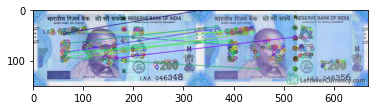

(<matplotlib.image.AxesImage at 0x1e219048160>, None)

In [22]:

print("File name and address of the image matched: "+training_set[max_pt])
print('Max Key Point matches ', max_val)
train_img = cv2.imread(training_set[max_pt])
img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
note = str(training_set[max_pt])
(plt.imshow(img3), plt.show())